In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#import altair as alt
import re
#from vega_datasets import data
import seaborn as sns
sns.set()


In [2]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
# Simple functions 
# Histogram
def basic_hist(col, title, x_name, y_name):
    """
    col: Dataframe column to be made into a histogram
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.hist(col, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()

def basic_bar(col, col_2, title, x_name, y_name):
    """
    col: Dataframe column to be made into a bar plot, names of each column
    col_2: Values of each column 
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.bar(col, col_2, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()    

In [4]:
# Load datasets
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')
participants = pd.read_csv('../databases/participants.zip', compression='zip')
states = pd.read_csv('../databases/states.zip', compression='zip')

## Número de Incidentes por Estado

Text(0, 0.5, 'Número de estados')

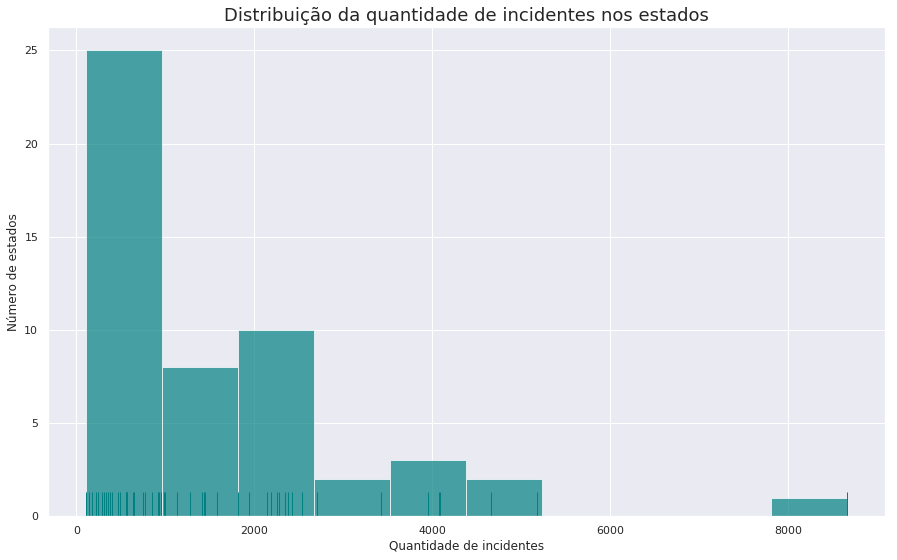

In [5]:
sns.distplot(
    states['number_of_incidents'],
    kde=False,
    rug=True,
    color='teal',
    hist_kws=dict(alpha=0.7)
)

# Título do plot
plt.title("Distribuição da quantidade de incidentes nos estados", fontsize=18)
# Nome do eixo x
plt.xlabel('Quantidade de incidentes')
# Nome do eixo y
plt.ylabel('Número de estados')

#### Por estado dos EUA

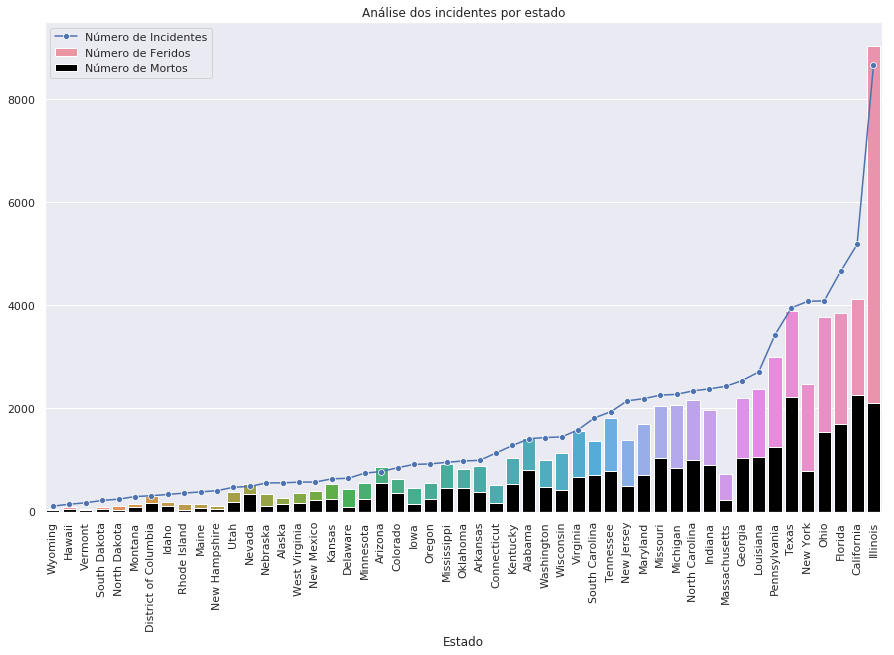

In [6]:
# Needs improvement - conferir se num de acidentes faz sentido com num de feridos

# Tirar o comentário abaixo para ajustar o tamanho da figura com essa linha caso desejado:
#matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

states['total_killed_injured'] = (states['n_injured'] + states['n_killed'])
sorted_states = states.sort_values('number_of_incidents')

# Define o plot
sns.lineplot(x='state', y='number_of_incidents', marker='o',
                     data=sorted_states, label='Número de Incidentes', sort=False)
sns.barplot(x='state', y='total_killed_injured',
                     data=sorted_states, label='Número de Feridos')
sns.barplot(x='state', y='n_killed', color="black",
                     data=sorted_states,label='Número de Mortos')
# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()

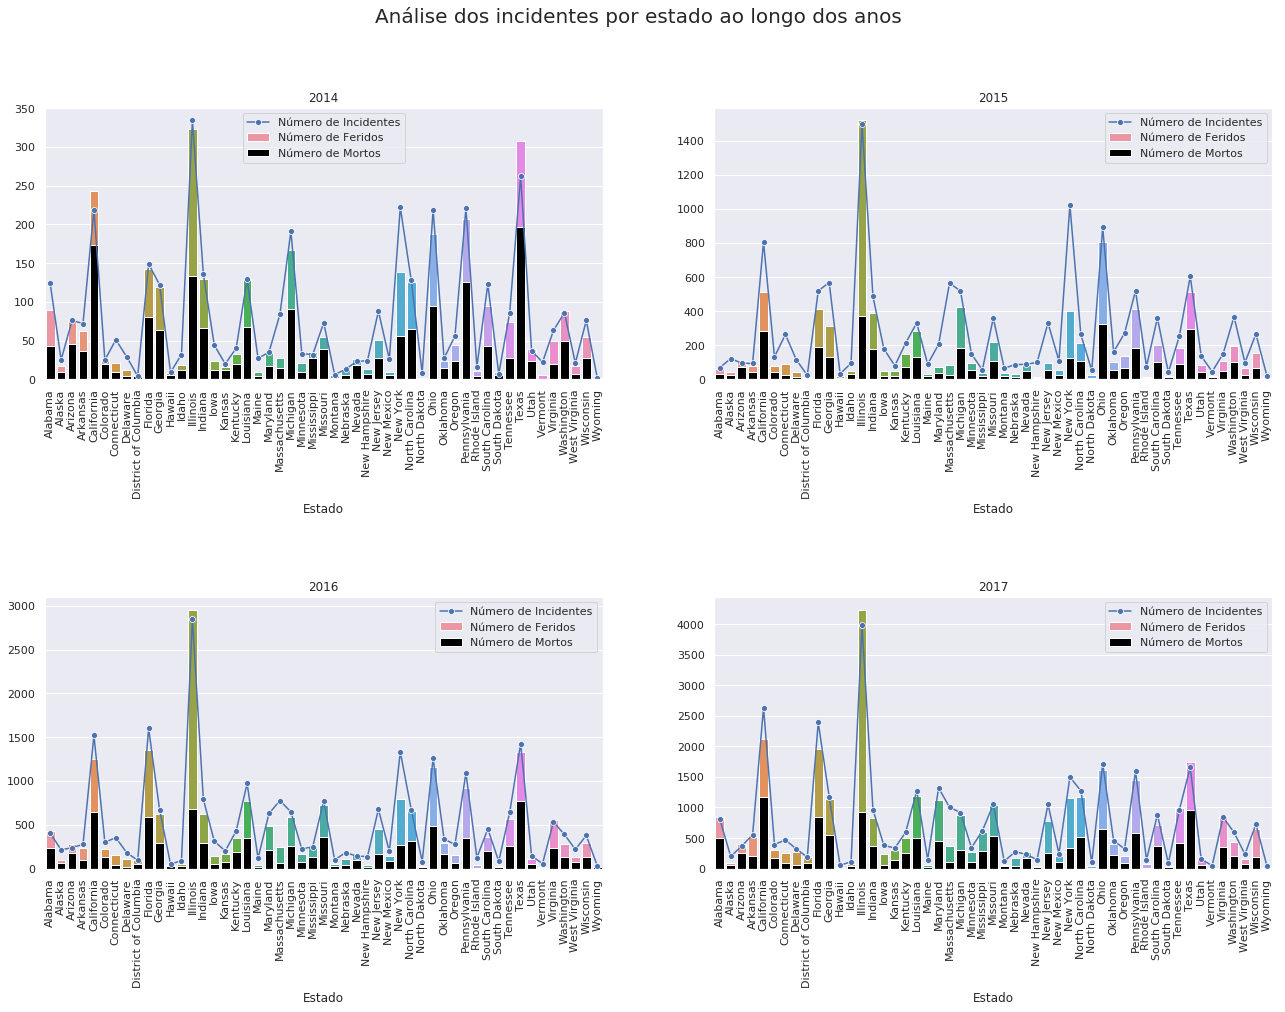

In [7]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Análise dos incidentes por estado ao longo dos anos', fontsize=20)

for index, year in enumerate(range(2014, 2018)):
    ax = fig.add_subplot(2,2,index+1)
    states[f'total_killed_injured_{year}'] = (states[f'n_injured_{year}'] +
                                              states[f'n_killed_{year}'])

    # Define o plot
    sns.lineplot(x='state', y=f'number_of_incidents_{year}', marker='o',
                         data=states, label='Número de Incidentes', sort=False)
    sns.barplot(x='state', y=f'total_killed_injured_{year}',
                         data=states, label='Número de Feridos')
    sns.barplot(x='state', y=f'n_killed_{year}', color="black",
                         data=states,label='Número de Mortos')
    # Título do plot
    plt.title(year)
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()

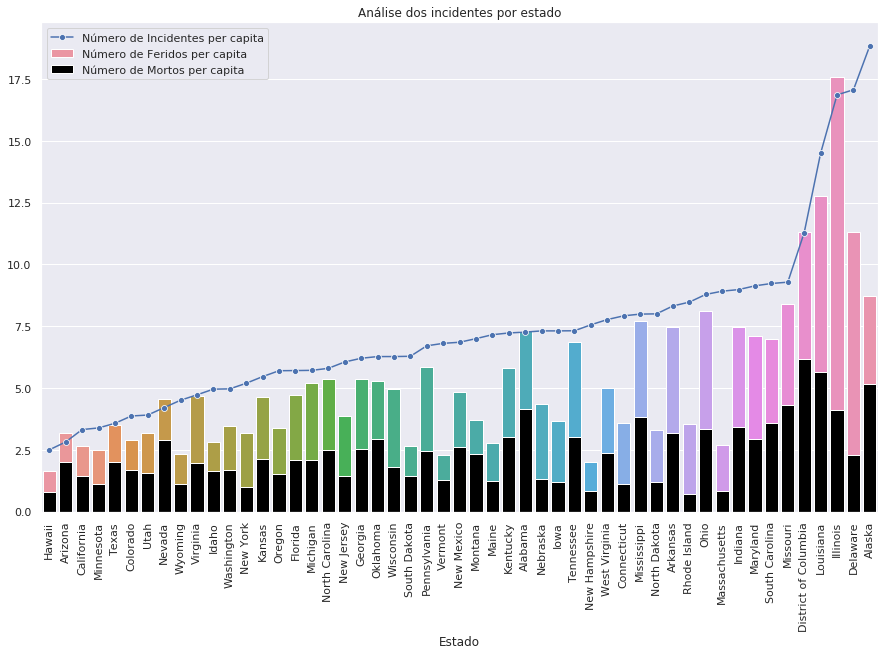

In [8]:
# Ajusta um dataframe com os dados para plotar

states['killed_injured_per_capita'] = (states['injured_per_capita'] +
                                       states['killed_per_capita'])
sorted_states = states.sort_values('incidents_per_capita')

# Define o plot
sns.lineplot(x='state', y='incidents_per_capita', marker='o',
                     data=sorted_states, label='Número de Incidentes per capita', sort=False)
sns.barplot(x='state', y='killed_injured_per_capita',
                     data=sorted_states, label='Número de Feridos per capita')
sns.barplot(x='state', y='killed_per_capita', color="black",
                     data=sorted_states,label='Número de Mortos per capita')
# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()

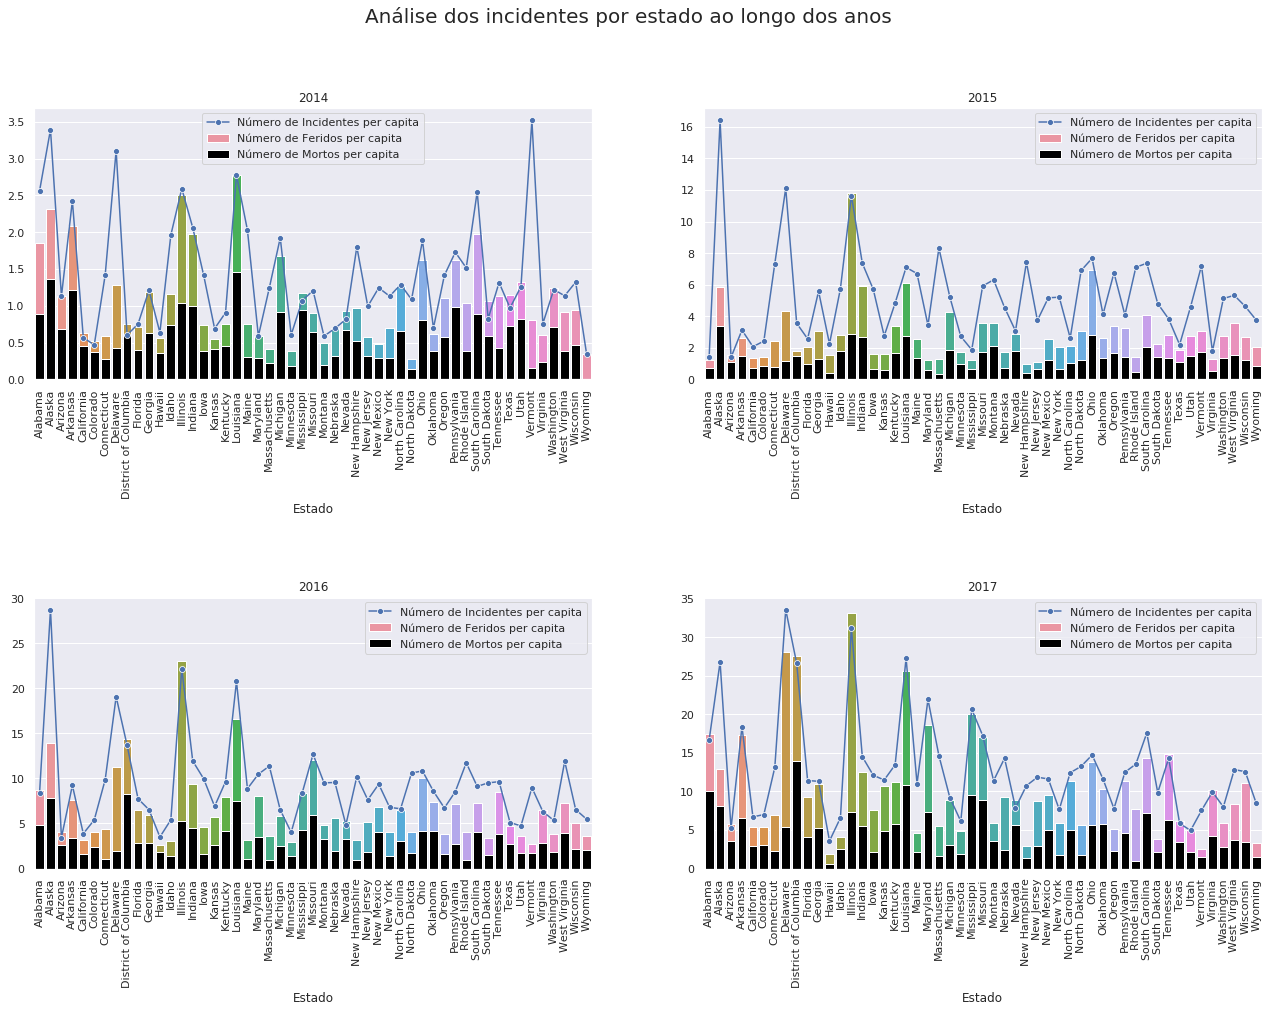

In [9]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Análise dos incidentes por estado ao longo dos anos', fontsize=20)

for index, year in enumerate(range(2014, 2018)):
    ax = fig.add_subplot(2,2,index+1)
    states[f'killed_injured_per_capita_{year}'] = (states[f'injured_per_capita_{year}'] +
                                                   states[f'killed_per_capita_{year}'])

    # Define o plot
    sns.lineplot(x='state', y=f'incidents_per_capita_{year}', marker='o',
                         data=states, label='Número de Incidentes per capita', sort=False)
    sns.barplot(x='state', y=f'killed_injured_per_capita_{year}',
                         data=states, label='Número de Feridos per capita')
    sns.barplot(x='state', y=f'killed_per_capita_{year}', color="black",
                         data=states,label='Número de Mortos per capita')
    # Título do plot
    plt.title(year)
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()

#### Ao longo dos anos

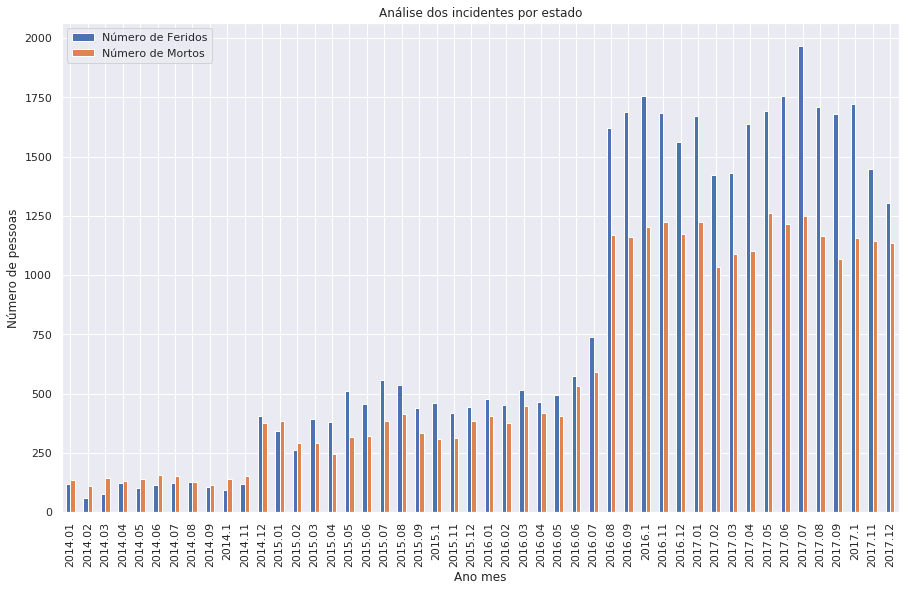

In [10]:
# Tirar o comentário abaixo para ajustar o tamanho da figura com essa linha caso desejado:
#matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

incidents_year = gun_violence.groupby(['month', 'year'])\
                  .agg({'n_injured':'sum', 'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('number_of_incidents')\
                  .reset_index()
incidents_year['date'] = incidents_year['month']/100 + incidents_year['year']

incidents_year['total'] = (incidents_year['n_injured'] + 
                                           incidents_year['n_killed'])

incidents_year = incidents_year.sort_values('date')

# Define o plot
incidents_year.plot.bar(x='date', y=['n_injured', 'n_killed'], label=['Número de Feridos', 'Número de Mortos'])

# Título do plot
plt.title("Análise dos incidentes por estado")
# Nome do eixo x
plt.xlabel('Ano mes')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Idade dos envolvidos

Text(0, 0.5, 'Número de pessoas')

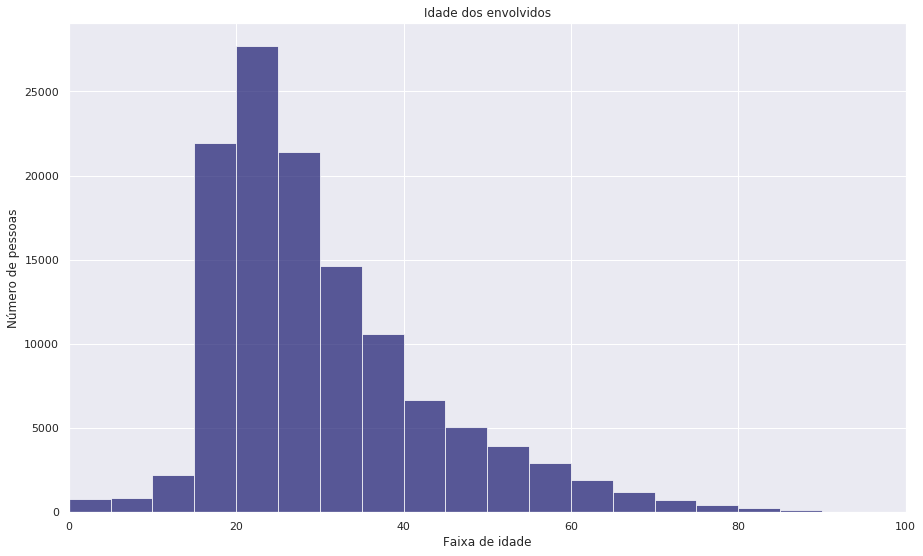

In [11]:
ax = sns.distplot(
    participants[['participant_age']],
    bins=[i for i in range(0,100, 5)],
    kde=False,
    color='midnightblue',
    hist_kws=dict(alpha=0.7)
)

# Limita os valores dos eixos
ax.set(xlim=(0, 100))
# Título do plot
plt.title("Idade dos envolvidos")
# Nome do eixo x
plt.xlabel('Faixa de idade')
# Nome do eixo y
plt.ylabel('Número de pessoas')

## Trends

In [12]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

### Incidents per year

Text(0, 0.5, 'Número de incidentes')

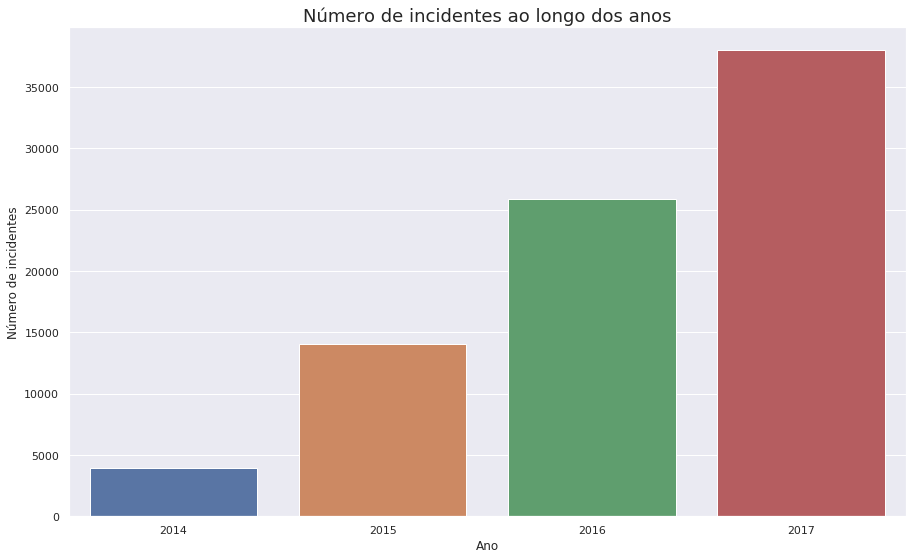

In [13]:
a_per_year = (gun_violence.groupby('year')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'number_of_incidents'}))

sns.barplot(
    a_per_year['year'],
    a_per_year['number_of_incidents'],
)

# Título do plot
plt.title("Número de incidentes ao longo dos anos", fontsize=18)
# Nome do eixo x
plt.xlabel('Ano')
# Nome do eixo y
plt.ylabel('Número de incidentes')

Observado uma tendência crescente de 2014 até 2017. 
2018 não possui dados completos do ano todo, a expectativa na época de coleta da base era de crescimento em comparação a 2017.
2013 é um ano de baixo número de entradas na base.

###  Average per month

Text(0, 0.5, 'Número de Incidentes')

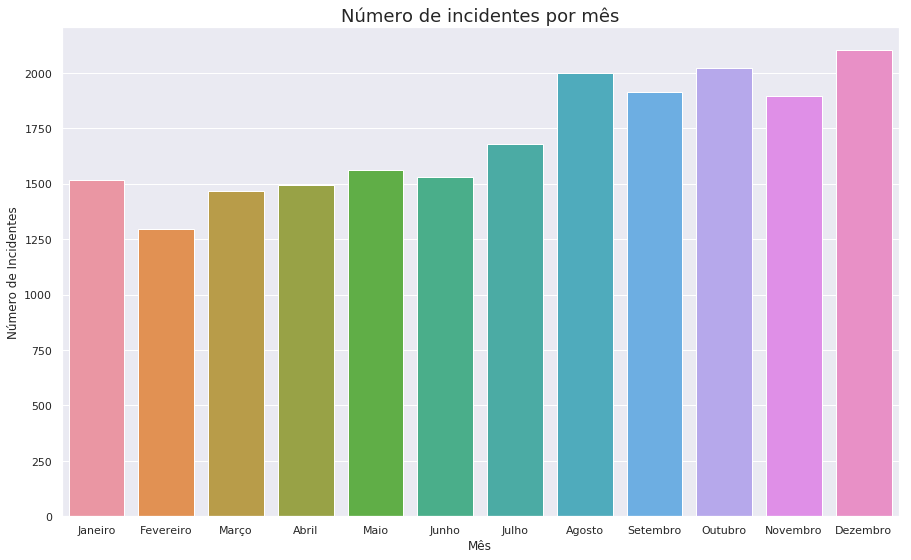

In [14]:
mean_per_month = (gun_violence.groupby('month')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'number_of_incidents'}))

mean_per_month['number_of_incidents'] /= 4

mean_per_month['month'] = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]

sns.barplot(
    mean_per_month['month'],
    mean_per_month['number_of_incidents'],
)

# Título do plot
plt.title("Número de incidentes por mês", fontsize=18)
# Nome do eixo x
plt.xlabel('Mês')
# Nome do eixo y
plt.ylabel('Número de Incidentes')

Dezembro e Outubro são os meses com maior número médio de incidentes, ultrapassando 2000 incidentes por ano em média.
Fevereiro é o mês com menor número de incidentes, tendo em média pouco mais de 1250 incidentes a cada ano.
É possível perceber uma tendência de mais incidentes no segundo semestre do ano.

###  Série temportal para total de incidentes, mortos e feridos

In [15]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

In [16]:
df['year'] = df['date'].map(lambda x: x[0:4])
df['year-month'] = df['date'].map(lambda x: x[0:4] + '-' + x[5:7])

### 2014 time series


In [17]:
temp = df[df['year'] == '2014'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [18]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

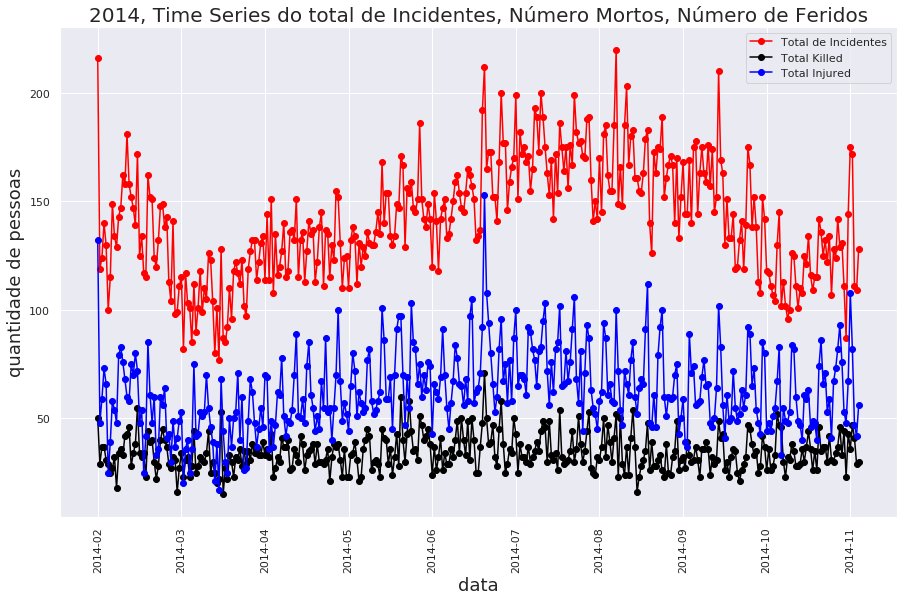

In [19]:

title = '2014, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2015 time series


In [20]:
temp = df[df['year'] == '2015'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [21]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

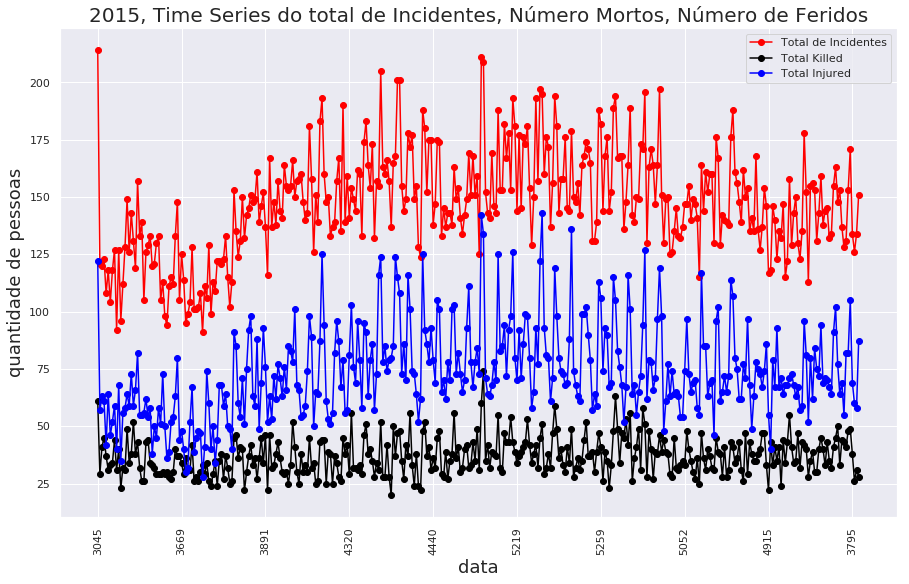

In [22]:

title = '2015, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2016 time series


In [23]:
temp = df[df['year'] == '2016'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [24]:
labels = df[df['year'] == '2016'].groupby('year-month').count().reset_index()

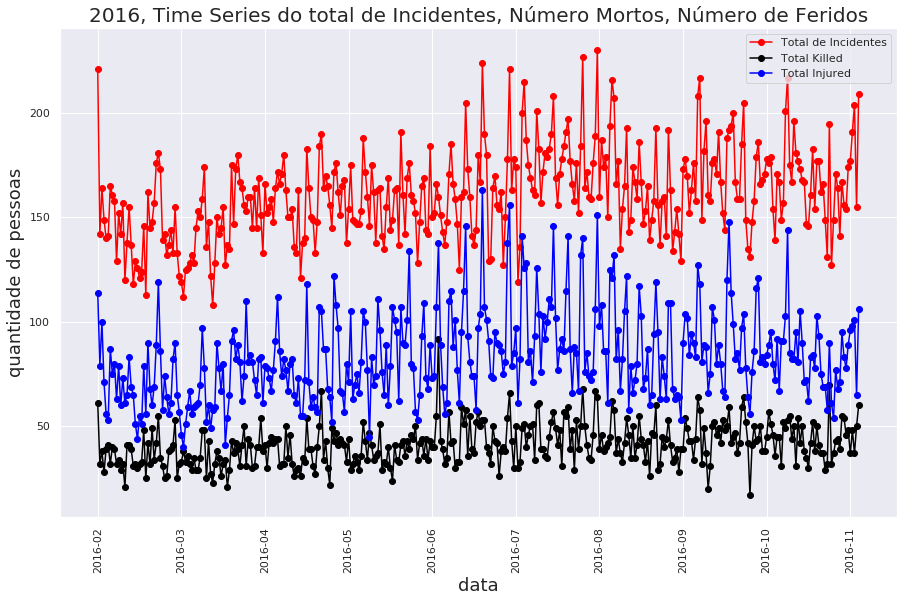

In [25]:

title = '2016, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(13))
plt.legend()
plt.show()


### 2017 time series


In [26]:
temp = df[df['year'] == '2017'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

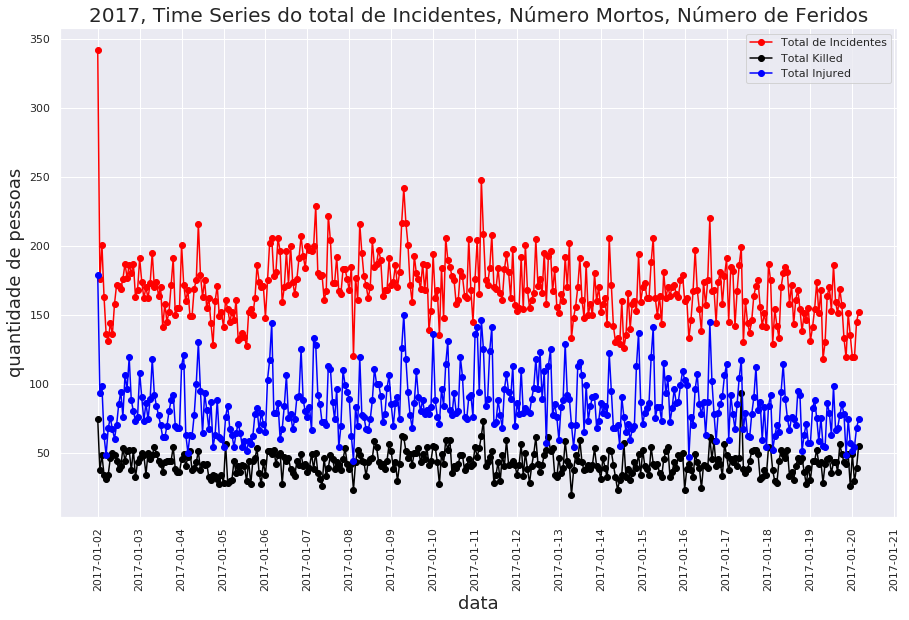

In [27]:

title = '2017, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend()
plt.show()


### Todos os anos time series


In [28]:
temp = df[df['year-month'] > '2013-12'].groupby('year-month')\
         .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
         .reset_index()\
         .rename(columns={'state' : 'incidents'})

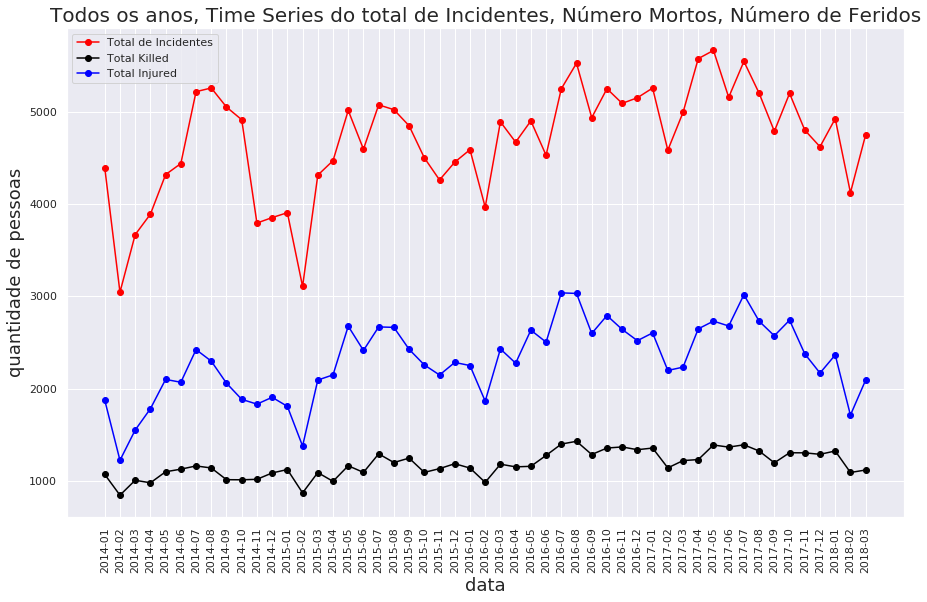

In [29]:
title = 'Todos os anos, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['year-month'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['year-month'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['year-month'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['year-month'], rotation='90')

plt.legend()
plt.show()
